# Post-hoc analyses of simulations

In [72]:
import matplotlib
%matplotlib nbagg
from matplotlib import pyplot

In [73]:
from statiskit import core

In [74]:
import os
import re
observations = set()
alphas = set()
for filepath in os.listdir('.'):
    pattern = re.match('simulation_(.*)-(.*).csv', filepath)
    if pattern:
        observations.add(int(pattern.groups()[0]))
        alphas.add(float(pattern.groups()[1]))
alphas = sorted(alphas)
observations = sorted(observations)

In [75]:
def box_plot_by_alpha(fig, alpha):
    axes = fig.add_subplot(1, 1, 1)
    for observation in observations:
        filepath = 'simulation_' + str(observation) + '-' + str(alpha) + '.csv'
        if os.path.exists(filepath):
            data = core.read_csv(filepath)
            data.components[5].box_plot(axes = fig.add_subplot(111),
                                        pos = observations.index(observation),
                                        extrema = False,
                                        facecolor = '#e6e6e6')
    axes.set_xticks(range(len(observations)))
    axes.set_xticklabels([str(observation) for observation in observations])
    axes.yaxis.grid(True, linestyle='--')
#     axes.set_yticklabels([str(float(yticklabel) * 100) for yticklabel in axes.get_yticklabels()])
    axes.set_frame_on(False)
    return axes

<IPython.core.display.Javascript object>


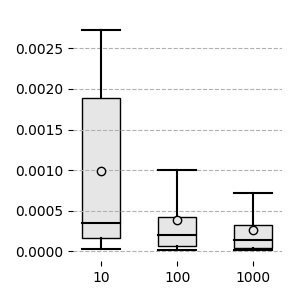

<IPython.core.display.Javascript object>


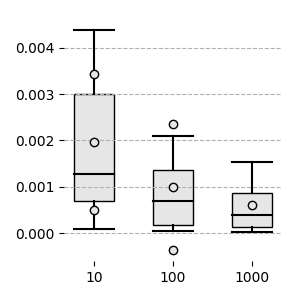

In [76]:
for alpha in alphas:
    fig = pyplot.figure(figsize = (3,3))
    axes = box_plot_by_alpha(fig, alpha)
    pyplot.tight_layout()
    try:
        fig.savefig('alpha_' + str(alpha) + '.pgf')
    except:
        pass
    fig.savefig('alpha_' + str(alpha) + '.svg')

In [77]:
def box_plot_by_observation(fig, observation):
    axes = fig.add_subplot(1, 1, 1)
    for alpha in alphas:
        filepath = 'simulation_' + str(observation) + '-' + str(alpha) + '.csv'
        if os.path.exists(filepath):
            data = core.read_csv(filepath)
            data.components[5].box_plot(axes = fig.add_subplot(111),
                                        pos = alphas.index(alpha),
                                        extrema = False,
                                        facecolor = '#e6e6e6')
    axes.set_xticks(range(len(alphas)))
    axes.set_xticklabels([str(alpha) for alpha in alphas])
    axes.yaxis.grid(True, linestyle='--')
    axes.set_frame_on(False)
    return axes

<IPython.core.display.Javascript object>


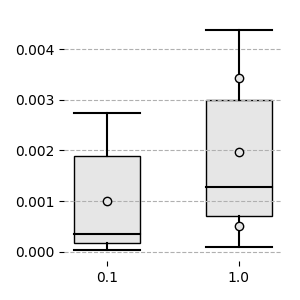

<IPython.core.display.Javascript object>


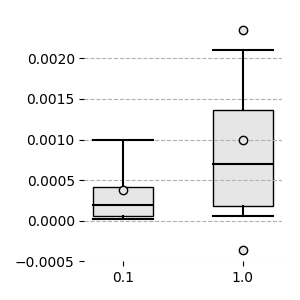

<IPython.core.display.Javascript object>


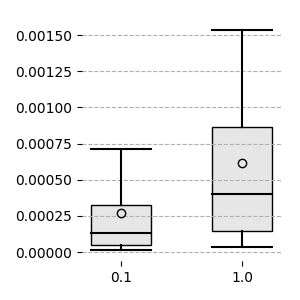

In [78]:
for observation in observations:
    fig = pyplot.figure(figsize = (3,3))
    axes = box_plot_by_observation(fig, observation)
    pyplot.tight_layout()
    try:
        fig.savefig('observation_' + str(observation) + '.pgf')
    except:
        pass
    fig.savefig('observation_' + str(observation) + '.svg')